# # Classifiers introduction

In the following program we introduce the basic steps of classification of a dataset in a matrix

Import the package for learning and modeling trees

In [67]:
from sklearn import tree 
import numpy as np

Define the matrix containing the data (one example per row)
and the vector containing the corresponding target value

In [68]:
X = [[0, 0, 0], [1, 1, 1], [0, 1, 0], [0, 0, 1], [1, 1, 0], [1, 0, 1]]
Y = [1, 0, 0, 0, 1, 1]

Declare the classification model you want to use and then fit the model to the data

In [69]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

Predict the target value (and print it) for the passed data, using the fitted model currently in clf

In [70]:
print(clf.predict([[0, 1, 1]]))

[0]


In [71]:
print(clf.predict([[1, 0, 1],[0, 0, 1]]))

[1 0]


In [72]:
#dot_data = tree.export_graphviz(clf, out_file=None)  
#graph = graphviz.Source(dot_data)  
#graph

In the following we start using a dataset (from UCI Machine Learning repository)

In [73]:
from sklearn.datasets import load_iris
iris = load_iris()

#inflate
#iris.data, iris.target = inflate(iris.data, iris.target, 'versicolor')

# Declare the type of prediction model and the working criteria for the model induction algorithm

In [74]:
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=10,class_weight={0:1,1:10,2:10},max_depth=5)

# Split the dataset in training and test set

In [75]:
# Generate a random permutation of the indices of examples that will be later used 
# for the training and the test set
import numpy as np
np.random.seed(0)
indices = np.random.permutation(len(iris.data))

# We now decide to keep the last 10 indices for test set, the remaining for the training set
indices_training=indices[:-10]
indices_test=indices[-10:]

iris_X_train = iris.data[indices_training] # keep for training all the matrix elements with the exception of the last 10 
iris_y_train = iris.target[indices_training]
iris_X_test  = iris.data[indices_test] # keep the last 10 elements for test set
iris_y_test  = iris.target[indices_test]

# Fit the learning model on training set

In [76]:
# fit the model to the training data
clf = clf.fit(iris_X_train, iris_y_train)

# Obtain predictions

In [77]:
# apply fitted model "clf" to the train set 
predicted_y_train = clf.predict(iris_X_train)
# apply fitted model "clf" to the test set 
predicted_y_test = clf.predict(iris_X_test)

# print the predictions (class numbers associated to classes names in target names)
print("Predictions:")
print(predicted_y_test)
print("True classes:")
print(iris_y_test) 
print(iris.target_names)

Predictions:
[1 2 1 0 0 0 2 1 2 0]
True classes:
[1 1 1 0 0 0 2 1 2 0]
['setosa' 'versicolor' 'virginica']


Print the index of the test instances and the corresponding predictions

In [78]:
# print the corresponding instances indexes and class names 
for i in range(len(iris_y_test)): 
    print("Instance # "+str(indices_test[i])+": ")
    print("Predicted: "+iris.target_names[predicted_y_test[i]]+"\t True: "+iris.target_names[iris_y_test[i]]+"\n")

Instance # 88: 
Predicted: versicolor	 True: versicolor

Instance # 70: 
Predicted: virginica	 True: versicolor

Instance # 87: 
Predicted: versicolor	 True: versicolor

Instance # 36: 
Predicted: setosa	 True: setosa

Instance # 21: 
Predicted: setosa	 True: setosa

Instance # 9: 
Predicted: setosa	 True: setosa

Instance # 103: 
Predicted: virginica	 True: virginica

Instance # 67: 
Predicted: versicolor	 True: versicolor

Instance # 117: 
Predicted: virginica	 True: virginica

Instance # 47: 
Predicted: setosa	 True: setosa



# Look at the specific examples

In [79]:
for i in range(len(iris_y_test)): 
    print("Instance # "+str(indices_test)+": ")
    s=""
    for j in range(len(iris.feature_names)):
        s=s+iris.feature_names[j]+"="+str(iris_X_test[i][j])
        if (j<len(iris.feature_names)-1): s=s+", "
    print(s)
    print("Predicted: "+iris.target_names[predicted_y_test[i]]+"\t True: "+iris.target_names[iris_y_test[i]]+"\n")

Instance # [ 88  70  87  36  21   9 103  67 117  47]: 
sepal length (cm)=5.6, sepal width (cm)=3.0, petal length (cm)=4.1, petal width (cm)=1.3
Predicted: versicolor	 True: versicolor

Instance # [ 88  70  87  36  21   9 103  67 117  47]: 
sepal length (cm)=5.9, sepal width (cm)=3.2, petal length (cm)=4.8, petal width (cm)=1.8
Predicted: virginica	 True: versicolor

Instance # [ 88  70  87  36  21   9 103  67 117  47]: 
sepal length (cm)=6.3, sepal width (cm)=2.3, petal length (cm)=4.4, petal width (cm)=1.3
Predicted: versicolor	 True: versicolor

Instance # [ 88  70  87  36  21   9 103  67 117  47]: 
sepal length (cm)=5.5, sepal width (cm)=3.5, petal length (cm)=1.3, petal width (cm)=0.2
Predicted: setosa	 True: setosa

Instance # [ 88  70  87  36  21   9 103  67 117  47]: 
sepal length (cm)=5.1, sepal width (cm)=3.7, petal length (cm)=1.5, petal width (cm)=0.4
Predicted: setosa	 True: setosa

Instance # [ 88  70  87  36  21   9 103  67 117  47]: 
sepal length (cm)=4.9, sepal width (c

# Obtain model performance results

In [80]:
# print some metrics results
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
acc_score = accuracy_score(iris_y_test, predicted_y_test)
print("Accuracy score: "+ str(acc_score))
f1=f1_score(iris_y_test, predicted_y_test, average='macro')
print("F1 score: "+str(f1))

Accuracy score: 0.9
F1 score: 0.885714285714


# Use Cross Validation

In [81]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score # will be used to separate training and test
iris = load_iris()
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight={0:1,1:1,2:1})
clf = clf.fit(iris.data, iris.target)
scores = cross_val_score(clf, iris.data, iris.target, cv=5) # score will be the accuracy
print(scores)

[ 0.96666667  1.          0.9         0.86666667  1.        ]


In [82]:
# computes F1- score
f1_scores = cross_val_score(clf, iris.data, iris.target, cv=5, scoring='f1_macro')
print(f1_scores)

[ 0.96658312  1.          0.89769821  0.86666667  1.        ]


# Show the resulting tree 

## 1. Print the picture in a PDF file

In [83]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("my_iris_predictions")

'my_iris_predictions.pdf'

## 2. Generate a picture here

In [84]:
print(list(iris.feature_names))
print(list(iris.target_names))

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa', 'versicolor', 'virginica']


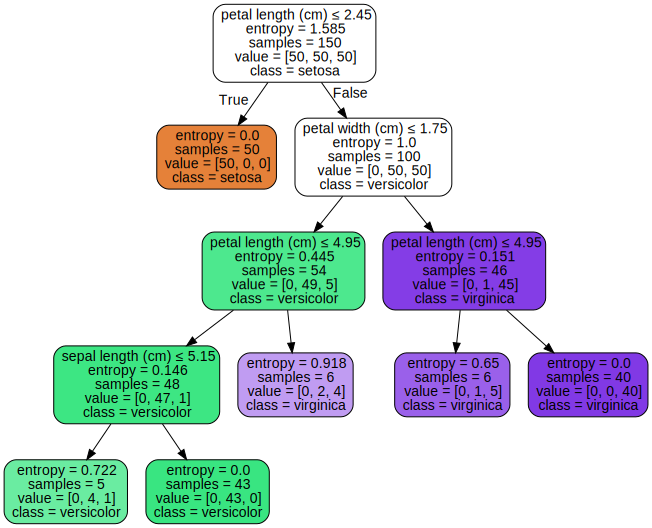

In [85]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names, 
                         class_names=iris.target_names, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

Modify the Jupyter Notebook program on iris classification so that you can:

#1 get an artificial inflation of some class by a given factor (weigh more the classes virginia e versicolor which are more difficult to discriminate).

In [86]:
def inflate(infl_data, infl_target, infl_class,infl_rate = 2):
    infl_data_to_add = []
    infl_target_to_add = []
    inflated = 0
    for i in range(iris.data.shape[0]):
        if(iris.target_names[iris.target[i]] == infl_class):
            for k in range(1,infl_rate):
                infl_data_to_add.append(iris.data[i,:])
                infl_target_to_add.append(iris.target[i])
                inflated += 1
    infl_data = np.append(infl_data,infl_data_to_add).reshape(infl_data.shape[0]+inflated, infl_data.shape[1])
    infl_target = np.append(infl_target, infl_target_to_add)
    return infl_data, infl_target

#2 modify the weight of some classes (set to 10 the weights for misclassification between virginia into versicolor and vice versa)
#3 avoid overfitting (by improving the error on the test set) tuning the parameters on: the minimum number of samples per leaf, max depth of the tree, min_impurity_decrease parameters, max leaf nodes, etc.
#4 build the confusion matrix 
#5 build the ROC curve (or coverage curve in coverage space)

In [87]:
from sklearn.metrics import confusion_matrix
confusion_matrix(iris_y_test, predicted_y_test)

array([[4, 0, 0],
       [0, 3, 1],
       [0, 0, 2]])

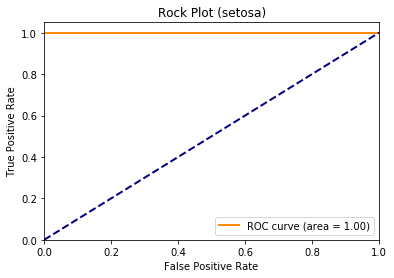

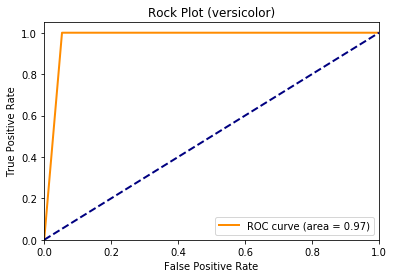

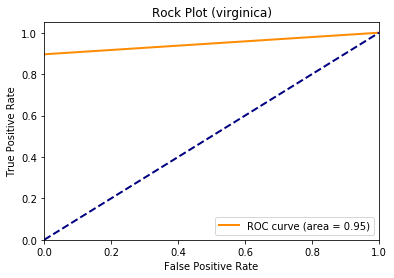

In [88]:
#build the ROC curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,auc

iris_y_train = label_binarize(iris_y_train, classes=[0, 1, 2])
predicted_y_train = label_binarize(predicted_y_train, classes=[0, 1, 2])
n_classes = len(iris.target_names)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(iris_y_train[:, i], predicted_y_train[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    #Print the plot
    plt.figure()
    lw = 2
    plt.plot(fpr[i], tpr[i], color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Rock Plot (%s)' % iris.target_names[i])
    plt.legend(loc="lower right")
    plt.show()